<a href="https://colab.research.google.com/github/aravindskumar98/AppliedDL/blob/main/HoG_LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
from skimage import feature

In [ ]:
import scipy.io
## Import data
mat = scipy.io.loadmat('/content/drive/MyDrive/YaleB_32x32.mat')

##obtain input pixels and output
fea = np.array(mat['fea'])
gnd = np.array(mat['gnd'])

##Data preprocessing

## join the input and output into one numpy array
data = np.concatenate((fea, gnd), axis=1)

In [ ]:
data_faces = np.split(data, np.where(np.diff(data[:,-1]))[0]+1)

k = 3, m = 30, p = 1, error_rate= 0.458
k = 3, m = 30, p = 2, error_rate= 0.408


Text(0, 0.5, 'error_rate %')

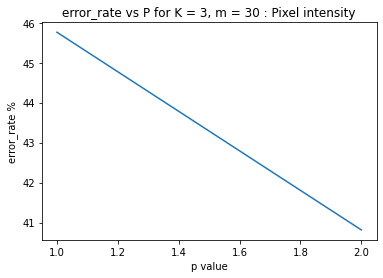

In [ ]:

## setting p value for distance metric
p_set = [1,2]
score_p = []

## defining distance function
def mydist(x, y):
  return np.sum((x-y)**pwr)

k = 3
m = 30

trainX = []
trainY = []
testX = []
testY = []
## iterate through each person and sample m instances
for person in data_faces:
  df = pd.DataFrame(person)
  training_data = df.sample(n = m, random_state=25)
  testing_data = df.drop(training_data.index)
  for i in range(len(training_data)):
    trainX.append(np.array(training_data.iloc[i,:])[:-1])
    trainY.append(np.array(training_data.iloc[i,:])[-1])
  for i in range(len(testing_data)):
    testX.append(np.array(testing_data.iloc[i,:])[:-1])
    testY.append(np.array(testing_data.iloc[i,:])[-1])

X_train = np.array(trainX)
y_train = np.array(trainY)
X_test = np.array(testX)
y_test = np.array(testY)


for pwr in p_set:

  ## defining the classifier
  nbrs = KNeighborsClassifier(n_neighbors=k, p = pwr)

  ## fitting it to the training data
  nbrs.fit(X_train, y_train)

  ## prediction of the KNN model
  pred_out = nbrs.predict(X_test)

  ## accuracy of the model
  accuracy = metrics.accuracy_score(pred_out, y_test)
  error_rate = 1 - accuracy
  print(f'k = {k}, m = {m}, p = {pwr}, error_rate= {error_rate:.3f}')
  score_p.append(error_rate*100)

plt.plot(p_set,score_p)
plt.title(f"error_rate vs P for K = {k}, m = {m} : Pixel intensity")
plt.xlabel("p value")
plt.ylabel("error_rate %")


# LBP

In [ ]:
## This function generates LBP images

def getLBPdata(data):
  output = []
  for i,dat in enumerate(data):
    img = data[i].reshape(32,32).T
    lbp = feature.local_binary_pattern(img,2,2)
    output.append(np.array(lbp.reshape(1,-1)))
  return np.array(output).reshape(-1,1024)
    

In [ ]:

## setting p value for distance metric
p_set = [1,2]
score_p_lbp = []

## defining distance function
def mydist(x, y):
  return np.sum((x-y)**pwr)

k = 3
m = 30

trainX = []
trainY = []
testX = []
testY = []
## iterate through each person and sample m instances
for person in data_faces:
  df = pd.DataFrame(person)
  training_data = df.sample(n = m, random_state=25)
  testing_data = df.drop(training_data.index)
  for i in range(len(training_data)):
    trainX.append(np.array(training_data.iloc[i,:])[:-1])
    trainY.append(np.array(training_data.iloc[i,:])[-1])
  for i in range(len(testing_data)):
    testX.append(np.array(testing_data.iloc[i,:])[:-1])
    testY.append(np.array(testing_data.iloc[i,:])[-1])

X_train = np.array(trainX)
y_train = np.array(trainY)
X_test = np.array(testX)
y_test = np.array(testY)

X_train_lbp = getLBPdata(X_train)
X_test_lbp = getLBPdata(X_test)
print(X_train.shape, X_train_lbp.shape)



(1140, 1024) (1140, 1024)


k = 3, m = 30, p = 1, error_rate= 0.018
k = 3, m = 30, p = 2, error_rate= 0.016


Text(0, 0.5, 'error_rate')

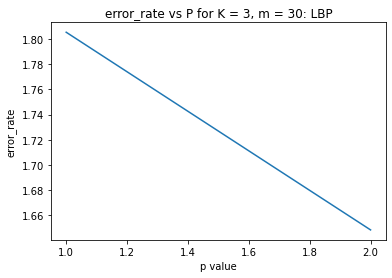

In [ ]:
for pwr in p_set:

  ## defining the classifier
  nbrs = KNeighborsClassifier(n_neighbors=k, p = pwr)

  ## fitting it to the training data
  nbrs.fit(X_train_lbp, y_train)

  ## prediction of the KNN model
  pred_out = nbrs.predict(X_test_lbp)

  ## accuracy of the model
  accuracy = metrics.accuracy_score(pred_out, y_test)
  error_rate = 1 - accuracy
  print(f'k = {k}, m = {m}, p = {pwr}, error_rate= {error_rate:.3f}')
  score_p_lbp.append(error_rate*100)

plt.plot(p_set,score_p_lbp)
plt.title(f"error_rate vs P for K = {k}, m = {m}: LBP")
plt.xlabel("p value")
plt.ylabel("error_rate")

In [ ]:
## HOG Images

# HOG Images

### Images are first upscaled  and then the procedure then HoG features are extracted

In [ ]:
from skimage.transform import resize

## This function creates HOG images from data provided
def getHOGdata(data):
  output = []
  for i,dat in enumerate(data):
    # print(i)
    img = data[i].reshape(32,32).T
    resized_img = resize(img, (128, 128))

    fd, hog_image = feature.hog(resized_img, visualize=True, multichannel=False)

    # plt.imshow(lbp)
    output.append(fd)
  return np.array(output).reshape(len(data),-1)

In [ ]:

## setting p value for distance metric
p_set = [1,2]

## defining distance function
def mydist(x, y):
  return np.sum((x-y)**pwr)

k = 3
m = 30

trainX = []
trainY = []
testX = []
testY = []
## iterate through each person and sample m instances
for j,person in enumerate(data_faces):
  df = pd.DataFrame(person)
  training_data = df.sample(n = m, random_state=25)
  testing_data = df.drop(training_data.index)
  for i in range(len(training_data)):
    trainX.append(np.array(training_data.iloc[i,:])[:-1])
    trainY.append(np.array(training_data.iloc[i,:])[-1])
  for i in range(len(testing_data)):
    testX.append(np.array(testing_data.iloc[i,:])[:-1])
    testY.append(np.array(testing_data.iloc[i,:])[-1])

X_train = np.array(trainX)
y_train = np.array(trainY)
X_test = np.array(testX)
y_test = np.array(testY)

X_train_hog = getHOGdata(X_train)
X_test_hog = getHOGdata(X_test)
print(X_train.shape, X_train_hog.shape)



(1140, 1024) (1140, 15876)


In [ ]:
score_p_hog = []
for pwr in p_set:

  ## defining the classifier
  nbrs = KNeighborsClassifier(n_neighbors=k, p = pwr)

  ## fitting it to the training data
  nbrs.fit(X_train_hog, y_train)

  ## prediction of the KNN model
  pred_out = nbrs.predict(X_test_hog)

  ## accuracy of the model
  accuracy = metrics.accuracy_score(pred_out, y_test)
  error_rate = 1 - accuracy
  print(f'k = {k}, m = {m}, p = {pwr}, error_rate= {error_rate:.3f}')
  score_p_hog.append(error_rate*100)



k = 3, m = 30, p = 1, error_rate= 0.058
k = 3, m = 30, p = 2, error_rate= 0.066


Text(0, 0.5, 'error_rate')

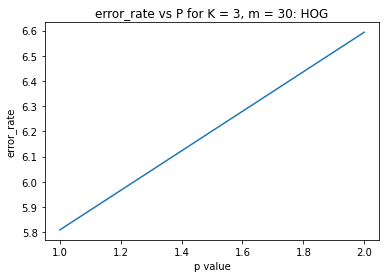

In [ ]:
plt.plot(p_set,score_p_hog)
plt.title(f"error_rate vs P for K = {k}, m = {m}: HOG")
plt.xlabel("p value")
plt.ylabel("error_rate")
